In [7]:
import pandas as pd

In [8]:
import os

In [11]:
jpg_directory = 'big_data_youtube_thumbnail/archive/youtube_thumbs/yt_thumbs/'

In [12]:
jpg_files = [f for f in os.listdir(jpg_directory) if f.endswith('.jpg')]

In [13]:
titles = [os.path.splitext(f)[0] for f in jpg_files]

In [14]:
titles_df = pd.DataFrame({
    'title': titles,
    'jpg_file': jpg_files
})

In [15]:
titles_df['full_path'] = titles_df['jpg_file'].apply(lambda x: os.path.join(jpg_directory, x))

In [16]:
print(titles_df.head())

                                               title  \
0  10_100906064_9930000_889_3662383127_100474_581...   
1  10_100906064_9930000_889_3662383127_14070_1707...   
2  10_100906064_9930000_889_3662383127_142225_231...   
3  10_100906064_9930000_889_3662383127_186868_461...   
4  10_100906064_9930000_889_3662383127_212166_487...   

                                            jpg_file  \
0  10_100906064_9930000_889_3662383127_100474_581...   
1  10_100906064_9930000_889_3662383127_14070_1707...   
2  10_100906064_9930000_889_3662383127_142225_231...   
3  10_100906064_9930000_889_3662383127_186868_461...   
4  10_100906064_9930000_889_3662383127_212166_487...   

                                           full_path  
0  big_data_youtube_thumbnail/archive/youtube_thu...  
1  big_data_youtube_thumbnail/archive/youtube_thu...  
2  big_data_youtube_thumbnail/archive/youtube_thu...  
3  big_data_youtube_thumbnail/archive/youtube_thu...  
4  big_data_youtube_thumbnail/archive/youtube_thu..

In [17]:
category_mapping = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "How-to & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers"
}


In [18]:
data = []

In [19]:
for file in jpg_files:
    # Remove the .jpg extension and split the filename by underscores
    components = os.path.splitext(file)[0].split('_')
    
    # Extract components
    category_id = int(components[0])
    seconds_from_channel_published = int(components[1])
    subscribers = int(components[2])
    total_videos = int(components[3])
    total_views_in_video = int(components[4])
    seconds_since_video_published = int(components[5])
    views = int(components[6])
    
    # Correctly remove the .jpg extension from the last component (likes)
    likes = components[7]

    # Map category_id to category name
    category_name = category_mapping.get(category_id, "Unknown")

    # Append the data as a list
    data.append([category_id, category_name, seconds_from_channel_published, subscribers,
                 total_videos, total_views_in_video, seconds_since_video_published, views, likes])

# Create a DataFrame with appropriate column names
columns = [
    'Category ID', 'Category Name', 'Seconds From Channel Published', 'Subscribers',
    'Total Videos', 'Total Views In Video', 'Seconds Since Video Published', 'Views', 'Likes'
]
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
print(df.head())

   Category ID Category Name  Seconds From Channel Published  Subscribers  \
0           10         Music                       100906064      9930000   
1           10         Music                       100906064      9930000   
2           10         Music                       100906064      9930000   
3           10         Music                       100906064      9930000   
4           10         Music                       100906064      9930000   

   Total Videos  Total Views In Video  Seconds Since Video Published    Views  \
0           889            3662383127                         100474   581459   
1           889            3662383127                          14070   170732   
2           889            3662383127                         142225    23102   
3           889            3662383127                         186868  4619927   
4           889            3662383127                         212166    48714   

        Likes  
0   14062.jpg  
1    8382.jpg  
2 

In [15]:
df.to_csv('extracted_thumbnail_data.csv', index=False)

In [20]:
df=pd.read_csv('extracted_thumbnail_data.csv')

In [21]:
df

,Category ID,Category Name,Seconds From Channel Published,Subscribers,Total Videos,Total Views In Video,Seconds Since Video Published,Views,Likes
0,10,Music,100906064,9930000,889,3662383127,100474,581459,14062.jpg
1,10,Music,100906064,9930000,889,3662383127,14070,170732,8382.jpg
2,10,Music,100906064,9930000,889,3662383127,142225,23102,1751.jpg
3,10,Music,100906064,9930000,889,3662383127,186868,4619927,175218.jpg
4,10,Music,100906064,9930000,889,3662383127,212166,48714,3767.jpg
...,...,...,...,...,...,...,...,...,...
27421,43,Shows,317751576,28000,12,3020,296461711,208,0.jpg
27422,43,Shows,317751576,28000,12,3020,297066602,277,2.jpg
27423,43,Shows,317751576,28000,12,3020,297671412,361,0.jpg
27424,43,Shows,317751576,28000,12,3020,297979745,665,9.jpg


In [22]:
df["Seconds From Channel Published"]=df["Seconds From Channel Published"]

In [23]:
df

,Category ID,Category Name,Seconds From Channel Published,Subscribers,Total Videos,Total Views In Video,Seconds Since Video Published,Views,Likes
0,10,Music,100906064,9930000,889,3662383127,100474,581459,14062.jpg
1,10,Music,100906064,9930000,889,3662383127,14070,170732,8382.jpg
2,10,Music,100906064,9930000,889,3662383127,142225,23102,1751.jpg
3,10,Music,100906064,9930000,889,3662383127,186868,4619927,175218.jpg
4,10,Music,100906064,9930000,889,3662383127,212166,48714,3767.jpg
...,...,...,...,...,...,...,...,...,...
27421,43,Shows,317751576,28000,12,3020,296461711,208,0.jpg
27422,43,Shows,317751576,28000,12,3020,297066602,277,2.jpg
27423,43,Shows,317751576,28000,12,3020,297671412,361,0.jpg
27424,43,Shows,317751576,28000,12,3020,297979745,665,9.jpg


In [20]:
df=df.drop("Seconds From Channel Published\t",axis=1)

KeyError: "['Seconds From Channel Published\\t'] not found in axis"

In [24]:
df

,Category ID,Category Name,Seconds From Channel Published,Subscribers,Total Videos,Total Views In Video,Seconds Since Video Published,Views,Likes
0,10,Music,100906064,9930000,889,3662383127,100474,581459,14062.jpg
1,10,Music,100906064,9930000,889,3662383127,14070,170732,8382.jpg
2,10,Music,100906064,9930000,889,3662383127,142225,23102,1751.jpg
3,10,Music,100906064,9930000,889,3662383127,186868,4619927,175218.jpg
4,10,Music,100906064,9930000,889,3662383127,212166,48714,3767.jpg
...,...,...,...,...,...,...,...,...,...
27421,43,Shows,317751576,28000,12,3020,296461711,208,0.jpg
27422,43,Shows,317751576,28000,12,3020,297066602,277,2.jpg
27423,43,Shows,317751576,28000,12,3020,297671412,361,0.jpg
27424,43,Shows,317751576,28000,12,3020,297979745,665,9.jpg


In [21]:
df["Seconds Since Video Published"]=df["Seconds Since Video Published"].astype(int)

In [25]:
df

,Category ID,Category Name,Seconds From Channel Published,Subscribers,Total Videos,Total Views In Video,Seconds Since Video Published,Views,Likes
0,10,Music,100906064,9930000,889,3662383127,100474,581459,14062.jpg
1,10,Music,100906064,9930000,889,3662383127,14070,170732,8382.jpg
2,10,Music,100906064,9930000,889,3662383127,142225,23102,1751.jpg
3,10,Music,100906064,9930000,889,3662383127,186868,4619927,175218.jpg
4,10,Music,100906064,9930000,889,3662383127,212166,48714,3767.jpg
...,...,...,...,...,...,...,...,...,...
27421,43,Shows,317751576,28000,12,3020,296461711,208,0.jpg
27422,43,Shows,317751576,28000,12,3020,297066602,277,2.jpg
27423,43,Shows,317751576,28000,12,3020,297671412,361,0.jpg
27424,43,Shows,317751576,28000,12,3020,297979745,665,9.jpg


In [26]:
df=df.replace(to_replace={'Likes': '.jpg'}, value='', regex=True)

In [27]:
df = df.rename(columns={'Seconds From Channel Published': 'Hours From Channel Published', 'Seconds Since Video Published': 'Hours Since Video Published'})

In [28]:
df

,Category ID,Category Name,Hours From Channel Published,Subscribers,Total Videos,Total Views In Video,Hours Since Video Published,Views,Likes
0,10,Music,100906064,9930000,889,3662383127,100474,581459,14062
1,10,Music,100906064,9930000,889,3662383127,14070,170732,8382
2,10,Music,100906064,9930000,889,3662383127,142225,23102,1751
3,10,Music,100906064,9930000,889,3662383127,186868,4619927,175218
4,10,Music,100906064,9930000,889,3662383127,212166,48714,3767
...,...,...,...,...,...,...,...,...,...
27421,43,Shows,317751576,28000,12,3020,296461711,208,0
27422,43,Shows,317751576,28000,12,3020,297066602,277,2
27423,43,Shows,317751576,28000,12,3020,297671412,361,0
27424,43,Shows,317751576,28000,12,3020,297979745,665,9


In [29]:
channel_df = df[['Subscribers', 'Total Videos']].drop_duplicates().reset_index(drop=True)


In [30]:
channel_df['C_ID'] = channel_df.index + 1

In [31]:
channel_df

,Subscribers,Total Videos,C_ID
0,9930000,889,1
1,215000,136,2
2,2020,1323,3
3,3140000,101,4
4,3990000,350,5
...,...,...,...
1253,1050000,855,1254
1254,38400,421,1255
1255,495000,398,1256
1256,496000,399,1257


In [32]:
df_n=df.copy()

In [33]:
df_n

,Category ID,Category Name,Hours From Channel Published,Subscribers,Total Videos,Total Views In Video,Hours Since Video Published,Views,Likes
0,10,Music,100906064,9930000,889,3662383127,100474,581459,14062
1,10,Music,100906064,9930000,889,3662383127,14070,170732,8382
2,10,Music,100906064,9930000,889,3662383127,142225,23102,1751
3,10,Music,100906064,9930000,889,3662383127,186868,4619927,175218
4,10,Music,100906064,9930000,889,3662383127,212166,48714,3767
...,...,...,...,...,...,...,...,...,...
27421,43,Shows,317751576,28000,12,3020,296461711,208,0
27422,43,Shows,317751576,28000,12,3020,297066602,277,2
27423,43,Shows,317751576,28000,12,3020,297671412,361,0
27424,43,Shows,317751576,28000,12,3020,297979745,665,9


In [34]:
df_n = df_n.merge(channel_df, on=['Subscribers', 'Total Videos'], how='left')

In [35]:
df_n = df_n[['C_ID', 'Category ID', 'Hours From Channel Published', 
         'Total Views In Video', 'Hours Since Video Published', 'Views', 'Likes']]

In [36]:
category_df = df[['Category ID', 'Category Name']].drop_duplicates().reset_index(drop=True)


In [37]:
category_df

,Category ID,Category Name
0,10,Music
1,15,Pets & Animals
2,17,Sports
3,19,Travel & Events
4,1,Film & Animation
5,20,Gaming
6,22,People & Blogs
7,23,Comedy
8,24,Entertainment
9,25,News & Politics


In [38]:
df_n

,C_ID,Category ID,Hours From Channel Published,Total Views In Video,Hours Since Video Published,Views,Likes
0,1,10,100906064,3662383127,100474,581459,14062
1,1,10,100906064,3662383127,14070,170732,8382
2,1,10,100906064,3662383127,142225,23102,1751
3,1,10,100906064,3662383127,186868,4619927,175218
4,1,10,100906064,3662383127,212166,48714,3767
...,...,...,...,...,...,...,...
27421,1258,43,317751576,3020,296461711,208,0
27422,1258,43,317751576,3020,297066602,277,2
27423,1258,43,317751576,3020,297671412,361,0
27424,1258,43,317751576,3020,297979745,665,9


In [35]:
channel_df.to_csv('channel_data.csv', index=False)

In [10]:
df

                                  C_ID  Category ID  \
C_ID                          1.000000     0.399548   
Category ID                   0.399548     1.000000   
Hours From Channel Published -0.040620    -0.076249   
Total Views In Video         -0.080879    -0.029740   
Hours Since Video Published  -0.086510    -0.061851   
Views                        -0.048631    -0.033994   
Likes                        -0.021769     0.017870   

                              Hours From Channel Published  \
C_ID                                             -0.040620   
Category ID                                      -0.076249   
Hours From Channel Published                      1.000000   
Total Views In Video                              0.252030   
Hours Since Video Published                       0.047686   
Views                                             0.018115   
Likes                                            -0.042892   

                              Total Views In Video  \
C_ID    

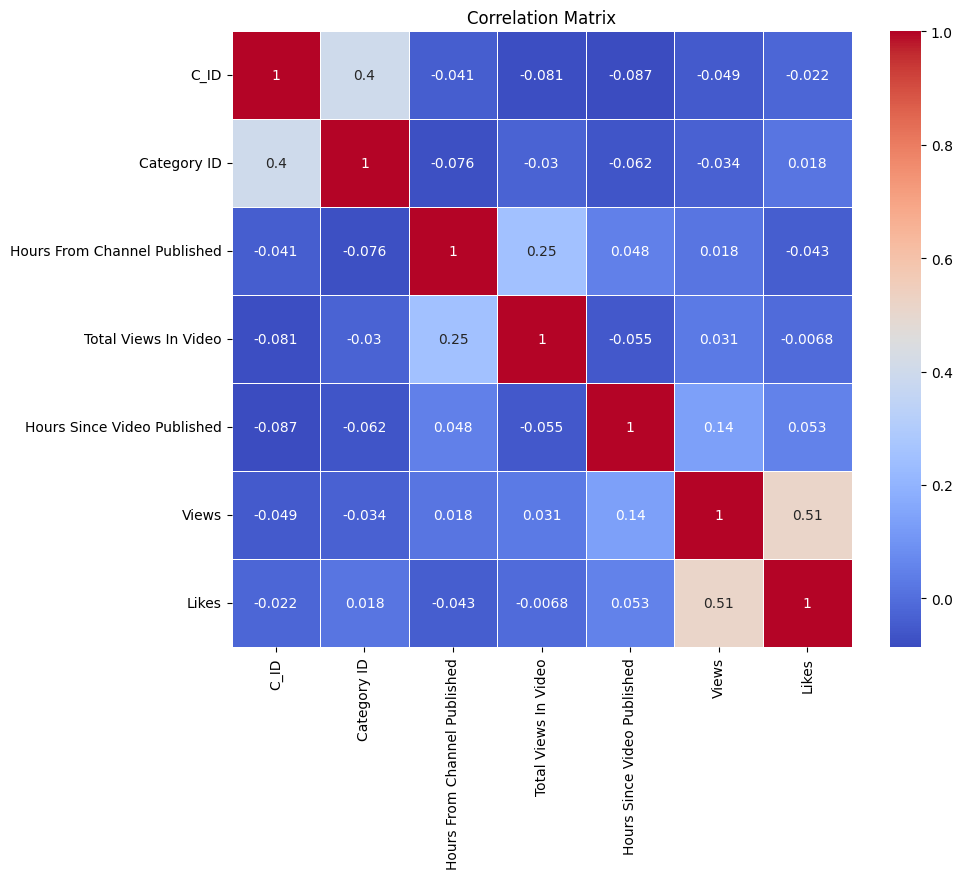

In [39]:
correlation_matrix = df_n.corr()

# Step 2: Display the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(df_n,test_size=0.2)

In [41]:
train_df

,C_ID,Category ID,Hours From Channel Published,Total Views In Video,Hours Since Video Published,Views,Likes
10276,512,22,310484591,863015191,1266393,253419,10106
6524,324,19,530431429,224030263,10527867,1879,60
287,20,10,211172652,29345915767,4904362,874533,153574
14838,730,24,255813332,13465963102,1230571,9143526,543377
6159,308,19,340400352,629764981,2658906,928814,60923
...,...,...,...,...,...,...,...
12583,625,23,48981680,6897343344,229004,967905,54552
8686,431,20,24187120,29001378,1211496,4651,295
12659,628,23,52510406,5297703183,911429,339446,22846
15116,741,24,287647086,8870732878,1930579,2005933,95010


In [42]:
test_df

,C_ID,Category ID,Hours From Channel Published,Total Views In Video,Hours Since Video Published,Views,Likes
442,31,10,250506291,5909310854,1149675,29957,1427
386,26,10,234530695,453959971,74224167,10197137,114167
3351,176,15,79694429,17083232686,306930,60312,2570
25743,805,29,489393802,103302998,275544,16494,1334
9236,461,20,85320329,146788267,65644,2059,64
...,...,...,...,...,...,...,...
7001,347,1,198975458,565034950,93737,3260,54
17388,847,24,70335406,11308233310,2241229,286131,14402
4159,212,17,242333458,3137417763,311561,54853,699
12686,629,23,52858509,5321949838,1259008,513964,32781


In [43]:
train_x=train_df.drop('Views',axis=1)
train_y=train_df['Views']
test_x=test_df.drop('Views',axis=1)
test_y=test_df['Views']

In [42]:
forest = RandomForestClassifier()
forest.fit(train_x,train_y)

MemoryError: could not allocate 5247336448 bytes

In [43]:
from sklearn.model_selection import train_test_split
train_x_small, _, train_y_small, _ = train_test_split(train_x, train_y, test_size=0.8, random_state=42)


In [44]:
forest = RandomForestClassifier(max_depth=10)  # Adjust the depth based on your needs


In [45]:
forest = RandomForestClassifier(n_estimators=50)  # Fewer trees


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model with some settings (you can adjust based on your needs)
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence

# Fit the model on the training data
log_reg.fit(train_x, train_y)

# Make predictions on the test set
predictions = log_reg.predict(test_x)

# Evaluate the model
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')


MemoryError: Unable to allocate 3.27 GiB for an array with shape (21940, 20017) and data type float64

ModuleNotFoundError: No module named 'dask_ml'

In [48]:
!pip install dask[complete]


  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.1 MB ? eta -:--:--
    --------------------------------------- 0.5/25.1 MB 322.8 kB/s eta 0:01:17
    --------------------------------------- 0.5/25.1 MB 322.8 kB/s eta 0:01:17
    --------------------------------------- 0.5/25.1 MB 322.8 kB/s eta 0:01:17
   - ----

In [42]:
import dask.dataframe as dd
from dask_ml.linear_model import LogisticRegression

# Convert your data to Dask DataFrame
train_x_dd = dd.from_array(train_x)
train_y_dd = dd.from_array(train_y)

# Train Logistic Regression model with Dask
log_reg = LogisticRegression()
log_reg.fit(train_x_dd, train_y_dd)


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [3]:
!pip install dask-ml

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 1.5 MB/s eta 0:00:02
   ----------- ---------------------------- 0.8/2.7 MB 987.4 kB/s eta 0:00:02
   ----------- ---------------------------- 0.8/2.7 MB 987.4 kB/s eta 0:00:02
   --------------- ------------------------ 1.0/2.7 MB 868.0 kB/s eta 0:00:02
   --------------- ------------------------ 1.0/2.7 MB 868.0 kB/s eta 0:00:02
   ------------------- -------------------- 1.3/2.7 MB 828.3 kB/s eta 0:00:02
   ------------------- -------------------- 1.3/2.7 MB 828.3 kB/s eta 0:00:02
   ----------------------- ---------------- 1.6/2.7 MB 798.7 kB/s eta 0:00:02
   ----------------------- ---------------- 1.6/2.7 MB 798.7 kB/s eta 0:00:02
   ---------------------

In [43]:
!pip install --upgrade dask pandas pyarrow


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.6 MB 699.0 kB/s eta 0:00:16
   - -------------------------------------- 0.5/11.6 MB 699.0 kB/s eta 0:00:16
   -- ------------------------------------- 0.8/11.6 MB 578.7 kB/s eta 0:00:19
   -- ------------------------------------- 0.8/11.6 MB 578.7 kB/s eta 0:00:19
   --- ------------------------------------ 1.0/11.6 MB 613.9 kB/s eta 0:00:18
   ---- ----------------------------------- 1.3/11.6 MB 664.5 kB/s eta 0:00:16
   ---- ----------------------------------- 1.3/11.6 MB 664.5 kB/s eta 0:00:16
   ---- ----------------------------------- 1.3/11.6 MB 664.5 kB/s eta 0:00:16
   ----- ---------------------------------- 1.6/11.6 MB 635.7 kB/s eta 0:00:16
   ------

  You can safely remove it manually.
  You can safely remove it manually.


In [44]:
!pip install dask==2023.8.1 pyarrow==13.0.0


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 699.0 kB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.2 MB 699.0 kB/s eta 0:00:01
   -------------------------- ------------- 0.8/1.2 MB 568.6 kB/s eta 0:00:01
   -------------------------- ------------- 0.8/1.2 MB 568.6 kB/s eta 0:00:01
   ----------------------------------- ---- 1.0/1.2 MB 662.0 kB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 641.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-expr 1.1.10 requires dask==2024.8.0, but you have dask 2023.8.1 which is incompatible.
distributed 2024.8.0 requires dask==2024.8.0, but you have dask 2023.8.1 which is incompatible.


In [44]:
print(train_x.dtypes)
print(train_y.dtypes)

C_ID                             int64
Category ID                      int64
Hours From Channel Published     int64
Total Views In Video             int64
Hours Since Video Published      int64
Likes                           object
dtype: object
int64


In [45]:
import dask
from sklearn.linear_model import LogisticRegression as LR
from dask import delayed

@delayed
def train_model(X, y):
    model = LR()
    model.fit(X, y)
    return model

# Train the model using delayed computation
delayed_model = train_model(train_x, train_y)
result = delayed_model.compute()


C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.linear_model import LogisticRegression

# Increase max_iter to allow more iterations
log_reg = LogisticRegression(max_iter=5000)  # Adjust this number as needed
log_reg.fit(train_x, train_y)


KeyboardInterrupt: 